In [1]:
import pandas as pd
import numpy as np

from ipynb.fs.full.utility_functions import (
    get_price_data,
    get_strategy_stats,
    find_cointegrated_pairs,
    calculate_covariance_directly,
)
from datetime import datetime
from enum import Enum

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

px_4h = get_price_data(univ[:20], '4h', True, './class_project_input_prices.csv')
px_4h

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,0.17754,NaN,NaN,NaN,NaN,NaN,17.597,NaN,NaN,0.017081
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,0.18064,NaN,NaN,NaN,NaN,NaN,17.951,NaN,NaN,0.017149
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,0.17948,NaN,NaN,NaN,NaN,NaN,18.076,NaN,NaN,0.017162
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,0.17933,NaN,NaN,NaN,NaN,NaN,18.345,NaN,NaN,0.016960
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,0.17903,NaN,NaN,NaN,NaN,NaN,18.085,NaN,NaN,0.016622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,0.35990,0.9997,0.475,NaN,0.7255,2.271,6.860,0.9845,23.36,0.024600
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,0.36020,0.9999,0.475,NaN,0.7345,2.271,6.920,0.9845,23.86,0.024660
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,0.36380,0.9999,0.475,NaN,0.7346,2.335,6.920,1.0028,24.99,0.024850


In [3]:
px_4h

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,0.17754,NaN,NaN,NaN,NaN,NaN,17.597,NaN,NaN,0.017081
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,0.18064,NaN,NaN,NaN,NaN,NaN,17.951,NaN,NaN,0.017149
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,0.17948,NaN,NaN,NaN,NaN,NaN,18.076,NaN,NaN,0.017162
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,0.17933,NaN,NaN,NaN,NaN,NaN,18.345,NaN,NaN,0.016960
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,0.17903,NaN,NaN,NaN,NaN,NaN,18.085,NaN,NaN,0.016622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,0.35990,0.9997,0.475,NaN,0.7255,2.271,6.860,0.9845,23.36,0.024600
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,0.36020,0.9999,0.475,NaN,0.7345,2.271,6.920,0.9845,23.86,0.024660
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,0.36380,0.9999,0.475,NaN,0.7346,2.335,6.920,1.0028,24.99,0.024850


In [4]:
# px_4h["GRTUSDT"].loc[~np.isnan(px_4h["GRTUSDT"])]

In [5]:
# grt_px = px_4h["GRTUSDT"].loc[datetime(2023, 1, 1, 0, 0):]
# eth_px = px_4h["ETHUSDT"].loc[datetime(2023, 1, 1, 0, 0):]

In [6]:
# cov = px_4h["ETHUSDT"].rolling(6 * 182).cov(px_4h["GRTUSDT"])
# var_grt = px_4h["GRTUSDT"].rolling(6 * 182).var()
# beta = cov / var_grt
# spread = px_4h["ETHUSDT"] - beta * px_4h["GRTUSDT"]
# spread

In [7]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 5))
# plt.plot(spread)

# plt.grid()
# plt.show()

In [8]:
# from statsmodels.tsa.stattools import coint

# score, pvalue, _ = coint(px_4h["ETHUSDT"].iloc[(-6*182):], px_4h["GRTUSDT"].iloc[(-6*182):])
# score

In [9]:
# score

In [10]:
# pvalue

In [11]:
# score, pvalue, _ = coint(
#     px_4h["ETHUSDT"].loc[datetime(2022, 9, 1, 0, 0):datetime(2023, 3, 1, 0, 0)],
#     px_4h["GRTUSDT"].loc[datetime(2022, 9, 1, 0, 0):datetime(2023, 3, 1, 0, 0)]
# )

In [12]:
# score

In [13]:
# pvalue

In [ ]:
period_px_4h = px_4h.loc[:datetime(2021, 12, 31, 20, 0)]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    0.05
)

In [15]:
pvalue_matrix

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
BTCUSDT,1.000000,0.581824,0.538122,0.494528,0.907079,0.223882,1.0,0.418502,0.475161,1.0,0.447355,9.120824e-01,1.0,1.0,1.0,7.764904e-01,4.563506e-01,1.0,1.0,4.353252e-01
ETHUSDT,0.581824,1.000000,0.823192,0.573937,0.940283,0.707553,1.0,0.916744,0.843008,1.0,0.802954,8.888275e-01,1.0,1.0,1.0,7.439481e-01,8.306371e-01,1.0,1.0,8.516807e-01
ADAUSDT,0.538122,0.823192,1.000000,0.749539,0.916633,0.007719,1.0,0.636063,0.647623,1.0,0.641623,2.209668e-01,1.0,1.0,1.0,7.801576e-02,6.326140e-01,1.0,1.0,5.969061e-01
BNBUSDT,0.494528,0.573937,0.749539,1.000000,0.778979,0.632297,1.0,0.896115,0.832378,1.0,0.884144,8.165000e-01,1.0,1.0,1.0,8.061454e-01,8.731905e-01,1.0,1.0,6.219330e-01
XRPUSDT,0.907079,0.940283,0.916633,0.778979,1.000000,1.000000,1.0,0.073896,0.064123,1.0,0.056166,1.000000e+00,1.0,1.0,1.0,1.000000e+00,7.661434e-02,1.0,1.0,8.437680e-02
DOTUSDT,0.223882,0.707553,0.007719,0.632297,1.000000,1.000000,1.0,0.541016,0.267241,1.0,0.000079,7.340088e-01,1.0,1.0,1.0,3.602414e-01,1.042763e-01,1.0,1.0,5.807658e-02
MATICUSDT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.0,1.000000e+00
LTCUSDT,0.418502,0.916744,0.636063,0.896115,0.073896,0.541016,1.0,1.000000,0.502355,1.0,0.054384,7.999645e-01,1.0,1.0,1.0,6.155162e-01,1.234293e-01,1.0,1.0,1.360626e-01
BCHUSDT,0.475161,0.843008,0.647623,0.832378,0.064123,0.267241,1.0,0.502355,1.000000,1.0,0.088987,7.128846e-01,1.0,1.0,1.0,4.241614e-01,4.511004e-03,1.0,1.0,2.587416e-01
LINKUSDT,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.0,1.000000e+00


In [17]:
pairs.sort(key=lambda x: x[2])
pairs

[('USDCUSDT', 'NEOUSDT', 3.383693205356831e-10),
 ('USDCUSDT', 'VETUSDT', 4.058548585826024e-10),
 ('USDCUSDT', 'FILUSDT', 1.815292904766476e-08),
 ('DOTUSDT', 'XLMUSDT', 7.882890583150227e-05),
 ('BCHUSDT', 'NEOUSDT', 0.004511003547116222),
 ('ADAUSDT', 'DOTUSDT', 0.007718982658758317),
 ('XLMUSDT', 'NEOUSDT', 0.012102532576088513)]

In [18]:
# pairs_valid_in_period = []
# interval_px = px_4h.loc[datetime(2022, 1, 1, 0, 0):datetime(2022, 6, 30, 20, 0)]

# for coin_a, coin_b, pvalue in pairs:
#     if np.isnan(interval_px[coin_a]).any():
#         continue
#     if np.isnan(interval_px[coin_b]).any():
#         continue
#     pairs_valid_in_period.append((coin_a, coin_b, pvalue))

# pairs_valid_in_period

In [19]:
# independent_coin = "DOTUSDT"
# dependent_coin = "XLMUSDT"

# cov = px_4h[dependent_coin].rolling(6 * 182).cov(px_4h[independent_coin])
# var_independent = px_4h[independent_coin].rolling(6 * 182).var()
# beta = cov / var_independent
# spread = px_4h[dependent_coin] - beta * px_4h[independent_coin]

# spread

In [20]:
# px_4h["ADAUSDT"].loc[~np.isnan(px_4h["ADAUSDT"])]

In [21]:
# px_4h["LINKUSDT"].loc[~np.isnan(px_4h["LINKUSDT"])]

In [22]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 5))
# plt.plot(spread.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

# plt.grid()
# plt.show()

In [109]:
# z_scores = (spread - spread.rolling(6 * 365).mean()) / spread.rolling(6 * 365).std()
# z_scores

In [110]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 5))
# plt.plot(z_scores.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

# plt.grid()
# plt.show()

In [86]:
independent_coin = "DOTUSDT"
dependent_coin = "XLMUSDT"
beta_calculation_num_periods = 6 * 182
z_score_calculation_num_periods = 6 * 45
entry_z_score = 2.00
exit_z_score = 1.00
min_period_req = 30

# XLM ~ b * DOT + a

###############################


def run_single_pair_trade_simulation(
    price_data,
    independent_coin,
    dependent_coin,
    beta_calculation_num_periods,
    z_score_calculation_num_periods,
    min_period_req,
    entry_z_score,
    exit_z_score
):
    cov = price_data[dependent_coin].rolling(beta_calculation_num_periods, min_periods=min_period_req).cov(price_data[independent_coin])
    var_independent = price_data[independent_coin].rolling(beta_calculation_num_periods, min_periods=min_period_req).var()
    beta = cov / var_independent
    spread = price_data[dependent_coin] - beta * price_data[independent_coin]
    z_scores = (spread - spread.rolling(z_score_calculation_num_periods, min_periods = min_period_req).mean()) / spread.rolling(z_score_calculation_num_periods, min_periods = min_period_req).std()

    df = pd.DataFrame({
        "beta": beta,
        "spread": spread,
        "z_score": z_scores,
    })

    df["spread position"] = np.nan
    df.loc[abs(df["z_score"].shift()) < exit_z_score, "spread position"] = 0
    df.loc[df["z_score"].shift() > entry_z_score, "spread position"] = -1
    df.loc[df["z_score"].shift() < -entry_z_score, "spread position"] = 1
    df["spread position"] = df["spread position"].ffill()
    df.loc[np.isnan(df["spread position"]), "spread position"] = 0

    open_long_spread_indices = ((df["spread position"] == 1) & (df["spread position"].shift() != 1))
    open_short_spread_indices = ((df["spread position"] == -1) & (df["spread position"].shift() != -1))
    close_long_spread_indices = (df["spread position"] == 0) & (df["spread position"].shift() == 1)
    close_short_spread_indices = (df["spread position"] == 0) & (df["spread position"].shift() == -1)

    df["dep coin share count"] = np.nan
    df["indep coin share count"] = np.nan
    df.loc[open_long_spread_indices, "dep coin share count"] = 1.0
    df.loc[open_long_spread_indices, "indep coin share count"] = -1 * df.shift().loc[open_long_spread_indices, "beta"]
    df.loc[open_short_spread_indices, "dep coin share count"] = -1.0
    df.loc[open_short_spread_indices, "indep coin share count"] = df.shift().loc[open_short_spread_indices, "beta"]
    absolute_dep_dollar_position = abs(df["dep coin share count"]) * price_data[dependent_coin].shift()
    absolute_indep_dollar_position = abs(df["indep coin share count"]) * price_data[independent_coin].shift()
    absolute_dollar_position = absolute_dep_dollar_position + absolute_indep_dollar_position
    df["dep coin share count"] = df["dep coin share count"] / absolute_dollar_position
    df["indep coin share count"] = df["indep coin share count"] / absolute_dollar_position
    df.loc[close_long_spread_indices, "dep coin share count"] = 0.0
    df.loc[close_long_spread_indices, "indep coin share count"] = 0.0
    df.loc[close_short_spread_indices, "dep coin share count"] = 0.0
    df.loc[close_short_spread_indices, "indep coin share count"] = 0.0
    df["dep coin share count"] = df["dep coin share count"].ffill()
    df["indep coin share count"] = df["indep coin share count"].ffill()
    df.loc[np.isnan(df["dep coin share count"]), "dep coin share count"] = 0.0
    df.loc[np.isnan(df["indep coin share count"]), "indep coin share count"] = 0.0

    df["dep coin closing dollar position"] = df["dep coin share count"] * price_data[dependent_coin]
    df["indep coin closing dollar position"] = df["indep coin share count"] * price_data[independent_coin]

    df["dep coin dollars earned"] = 0.0
    df.loc[open_long_spread_indices, "dep coin dollars earned"] = -1 * df.loc[open_long_spread_indices, "dep coin share count"] * price_data[dependent_coin].shift()
    df.loc[open_short_spread_indices, "dep coin dollars earned"] = -1 * df.loc[open_short_spread_indices, "dep coin share count"] * price_data[dependent_coin].shift()
    df.loc[close_long_spread_indices, "dep coin dollars earned"] = df.shift().loc[close_long_spread_indices, "dep coin share count"] * price_data[dependent_coin].shift()
    df.loc[close_short_spread_indices, "dep coin dollars earned"] = df.shift().loc[close_short_spread_indices, "dep coin share count"] * price_data[dependent_coin].shift()

    df["indep coin dollars earned"] = 0.0
    df.loc[open_long_spread_indices, "indep coin dollars earned"] = -1 * df.loc[open_long_spread_indices, "indep coin share count"] * price_data[independent_coin].shift()
    df.loc[open_short_spread_indices, "indep coin dollars earned"] = -1 * df.loc[open_short_spread_indices, "indep coin share count"] * price_data[independent_coin].shift()
    df.loc[close_long_spread_indices, "indep coin dollars earned"] = df.shift().loc[close_long_spread_indices, "indep coin share count"] * price_data[independent_coin].shift()
    df.loc[close_short_spread_indices, "indep coin dollars earned"] = df.shift().loc[close_short_spread_indices, "indep coin share count"] * price_data[independent_coin].shift()
    
    df["dollar turnover"] = 0.0
    df.loc[open_spread_indices, "dollar turnover"] = abs(df.loc[open_spread_indices, "dep coin dollars earned"]) + abs(df.loc[open_spread_indices, "indep coin dollars earned"])
    df.loc[close_spread_indices, "dollar turnover"] = abs(df.loc[close_spread_indices, "dep coin dollars earned"]) + abs(df.loc[close_spread_indices, "indep coin dollars earned"])

    df["cumulative earnings"] = df["dep coin dollars earned"].cumsum() + df["indep coin dollars earned"].cumsum()

    df["total position"] = df["dep coin closing dollar position"] + df["indep coin closing dollar position"] + df["cumulative earnings"]
    
    return df

# Cointegrated Pairs Identified From 2021

In [ ]:
trade_start_time = datetime(2022, 1, 1, 0, 0)
period_px_4h = px_4h.loc[:trade_start_time].iloc[:-1]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    0.01
)

In [264]:
pairs

[('ADAUSDT', 'DOTUSDT', 0.007718982658758317),
 ('DOTUSDT', 'XLMUSDT', 7.882890583150227e-05),
 ('BCHUSDT', 'NEOUSDT', 0.004511003547116222),
 ('USDCUSDT', 'FILUSDT', 1.815292904766476e-08),
 ('USDCUSDT', 'NEOUSDT', 3.383693205356831e-10),
 ('USDCUSDT', 'VETUSDT', 4.058548585826024e-10)]

In [265]:
price_data = px_4h.loc[trade_start_time:]
beta_calculation_num_periods = 6 * 182
z_score_calculation_num_periods = 6 * 45
entry_z_score = 2.00
exit_z_score = 1.00
    
total_position = pd.Series(0.0, index = price_data.index)

for pair in pairs:
    dependent_coin, independent_coin, _ = pair
    df = run_single_pair_trade_simulation(
        price_data,
        independent_coin,
        dependent_coin,
        beta_calculation_num_periods,
        z_score_calculation_num_periods,
        entry_z_score,
        exit_z_score
    )
    
    total_position += df["total position"]

total_position

open_time
2022-01-01 00:00:00    0.000000
2022-01-01 04:00:00    0.000000
2022-01-01 08:00:00    0.000000
2022-01-01 12:00:00    0.000000
2022-01-01 16:00:00    0.000000
                         ...   
2025-08-30 16:00:00    1.501212
2025-08-30 20:00:00    1.501212
2025-08-31 00:00:00    1.501212
2025-08-31 04:00:00    1.501212
2025-08-31 08:00:00    1.501212
Length: 8030, dtype: float64

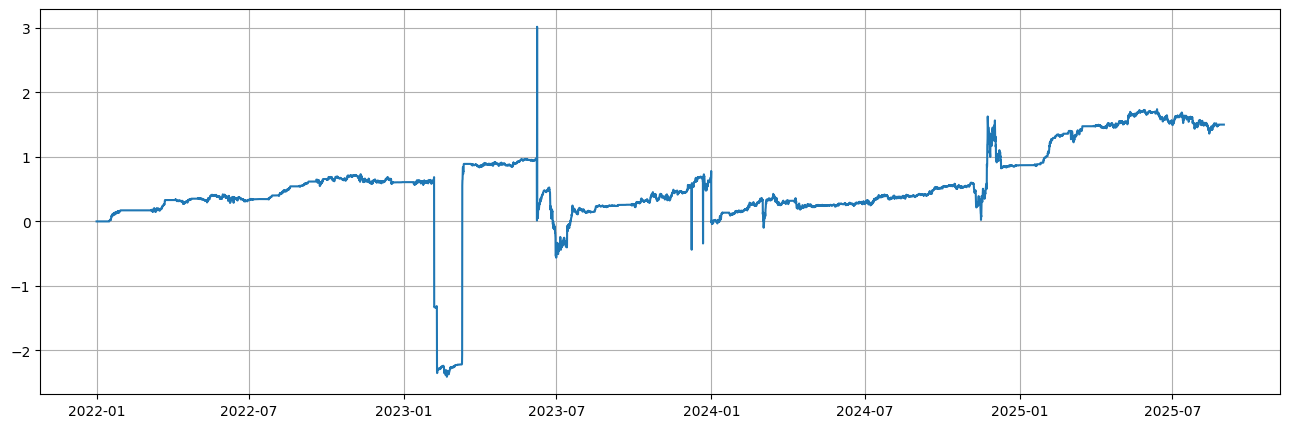

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(total_position)

plt.grid()
plt.show()

In [267]:
raw_gross_returns = total_position / total_position.shift() - 1
processed_gross_returns = raw_gross_returns[(raw_gross_returns != float('inf')) & (raw_gross_returns != float('-inf')) & (~np.isnan(raw_gross_returns))]
processed_gross_returns

open_time
2022-01-16 08:00:00    0.473912
2022-01-16 12:00:00    0.140699
2022-01-16 16:00:00    0.007612
2022-01-16 20:00:00    0.240271
2022-01-17 00:00:00    0.556636
                         ...   
2025-08-30 16:00:00    0.000000
2025-08-30 20:00:00    0.000000
2025-08-31 00:00:00    0.000000
2025-08-31 04:00:00    0.000000
2025-08-31 08:00:00    0.000000
Length: 7938, dtype: float64

In [268]:
processed_gross_returns.mean() / processed_gross_returns.std() * np.sqrt(365 * 6)

0.7879804494855001

# Cointegrated Pairs Identified From 2021 And 2022

In [ ]:
trade_start_time = datetime(2023, 1, 1, 0, 0)
period_px_4h = px_4h.loc[:trade_start_time].iloc[:-1]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    0.01
)

In [270]:
pairs

[('BTCUSDT', 'LINKUSDT', 0.0064278901123117045),
 ('ADAUSDT', 'LINKUSDT', 0.0036593905462054314),
 ('ADAUSDT', 'FILUSDT', 0.0038916727668773807),
 ('DOTUSDT', 'BCHUSDT', 0.00793427823654021),
 ('DOTUSDT', 'XLMUSDT', 0.008213861055351872),
 ('DOTUSDT', 'VETUSDT', 0.005173558125930247),
 ('LTCUSDT', 'XLMUSDT', 0.004846072299412702),
 ('BCHUSDT', 'XLMUSDT', 0.004291792812559196),
 ('LINKUSDT', 'XLMUSDT', 0.001271759304710879),
 ('LINKUSDT', 'EOSUSDT', 8.981985721530756e-05),
 ('LINKUSDT', 'FILUSDT', 0.00025323759007069095),
 ('LINKUSDT', 'NEOUSDT', 3.3975455546188905e-06),
 ('LINKUSDT', 'VETUSDT', 0.0024886238541744835),
 ('XLMUSDT', 'NEOUSDT', 0.003218382183823549),
 ('USDCUSDT', 'EOSUSDT', 0.001735843372164762),
 ('USDCUSDT', 'TRXUSDT', 0.003760980139154024),
 ('USDCUSDT', 'FILUSDT', 0.0015676367742512745),
 ('USDCUSDT', 'NEOUSDT', 0.0015762924780549602),
 ('USDCUSDT', 'VETUSDT', 0.002072687340445567)]

In [271]:
price_data = px_4h.loc[trade_start_time:]
beta_calculation_num_periods = 6 * 182
z_score_calculation_num_periods = 6 * 45
entry_z_score = 2.00
exit_z_score = 1.00
    
total_position = pd.Series(0.0, index = price_data.index)

for pair in pairs:
    dependent_coin, independent_coin, _ = pair
    df = run_single_pair_trade_simulation(
        price_data,
        independent_coin,
        dependent_coin,
        beta_calculation_num_periods,
        z_score_calculation_num_periods,
        entry_z_score,
        exit_z_score
    )
    
    total_position += df["total position"].fillna(0.0)

total_position

# dependent_coin = 'USDCUSDT'
# independent_coin = 'TRXUSDT'

# df = run_single_pair_trade_simulation(
#     price_data,
#     independent_coin,
#     dependent_coin,
#     beta_calculation_num_periods,
#     z_score_calculation_num_periods,
#     entry_z_score,
#     exit_z_score
# )

open_time
2023-01-01 00:00:00    0.000000
2023-01-01 04:00:00    0.000000
2023-01-01 08:00:00    0.000000
2023-01-01 12:00:00    0.000000
2023-01-01 16:00:00    0.000000
                         ...   
2025-08-30 16:00:00    1.380331
2025-08-30 20:00:00    1.369275
2025-08-31 00:00:00    1.377610
2025-08-31 04:00:00    1.367592
2025-08-31 08:00:00    1.355002
Length: 5840, dtype: float64

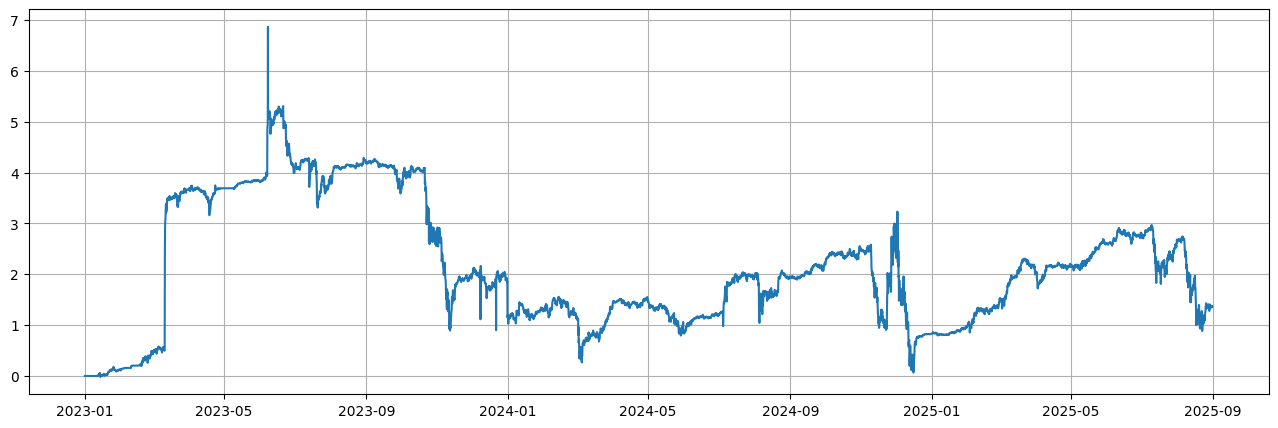

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(total_position)

plt.grid()
plt.show()

In [273]:
raw_gross_returns = total_position / total_position.shift() - 1
processed_gross_returns = raw_gross_returns[(raw_gross_returns != float('inf')) & (raw_gross_returns != float('-inf')) & (~np.isnan(raw_gross_returns))]
processed_gross_returns

open_time
2023-01-11 00:00:00    130.758788
2023-01-11 04:00:00     -0.012260
2023-01-11 08:00:00      0.023643
2023-01-11 12:00:00      0.165717
2023-01-11 16:00:00     -0.847439
                          ...    
2025-08-30 16:00:00      0.015000
2025-08-30 20:00:00     -0.008010
2025-08-31 00:00:00      0.006088
2025-08-31 04:00:00     -0.007272
2025-08-31 08:00:00     -0.009206
Length: 5780, dtype: float64

In [274]:
processed_gross_returns.mean() / processed_gross_returns.std() * np.sqrt(365 * 6)

1.1510427928198794

# Cointegrated Pairs Identified From 2021, 2022, 2023

In [ ]:
trade_start_time = datetime(2024, 1, 1, 0, 0)
period_px_4h = px_4h.loc[:trade_start_time].iloc[:-1]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    0.01
)

In [276]:
pairs

[('ETHUSDT', 'XRPUSDT', 0.008273833250599447),
 ('ADAUSDT', 'DOTUSDT', 0.006356425198187438),
 ('ADAUSDT', 'TRXUSDT', 0.0027275246974877475),
 ('ADAUSDT', 'FILUSDT', 1.0249606279421435e-05),
 ('BNBUSDT', 'XRPUSDT', 0.003825177780977881),
 ('DOTUSDT', 'TRXUSDT', 0.0028576324489276326),
 ('DOTUSDT', 'VETUSDT', 0.00020607749463003088),
 ('MATICUSDT', 'XTZUSDT', 0.0010332555165670143),
 ('LTCUSDT', 'XLMUSDT', 0.00028375485204124544),
 ('BCHUSDT', 'XLMUSDT', 0.00046387266356585894),
 ('LINKUSDT', 'USDCUSDT', 0.008102006979790834),
 ('LINKUSDT', 'TRXUSDT', 0.0006706986021277376),
 ('XLMUSDT', 'NEOUSDT', 0.0009703530246551218),
 ('USDCUSDT', 'EOSUSDT', 5.528759563357195e-18),
 ('USDCUSDT', 'TRXUSDT', 4.003203869463006e-09),
 ('USDCUSDT', 'XTZUSDT', 0.00043275820714688265),
 ('USDCUSDT', 'FILUSDT', 2.552756735608755e-18),
 ('USDCUSDT', 'NEOUSDT', 2.484659563432769e-18),
 ('USDCUSDT', 'DAIUSDT', 0.0015409338681439061),
 ('USDCUSDT', 'DASHUSDT', 0.0018112883692223867),
 ('USDCUSDT', 'VETUSDT', 2

In [277]:
price_data = px_4h.loc[trade_start_time:]
beta_calculation_num_periods = 6 * 182
z_score_calculation_num_periods = 6 * 45
entry_z_score = 2.00
exit_z_score = 1.00
    
total_position = pd.Series(0.0, index = price_data.index)

for pair in pairs:
    dependent_coin, independent_coin, _ = pair
    df = run_single_pair_trade_simulation(
        price_data,
        independent_coin,
        dependent_coin,
        beta_calculation_num_periods,
        z_score_calculation_num_periods,
        entry_z_score,
        exit_z_score
    )
    
    total_position += df["total position"].fillna(0.0)

total_position

open_time
2024-01-01 00:00:00    0.000000
2024-01-01 04:00:00    0.000000
2024-01-01 08:00:00    0.000000
2024-01-01 12:00:00    0.000000
2024-01-01 16:00:00    0.000000
                         ...   
2025-08-30 16:00:00    3.871663
2025-08-30 20:00:00    3.874294
2025-08-31 00:00:00    3.908935
2025-08-31 04:00:00    3.899026
2025-08-31 08:00:00    3.898753
Length: 3651, dtype: float64

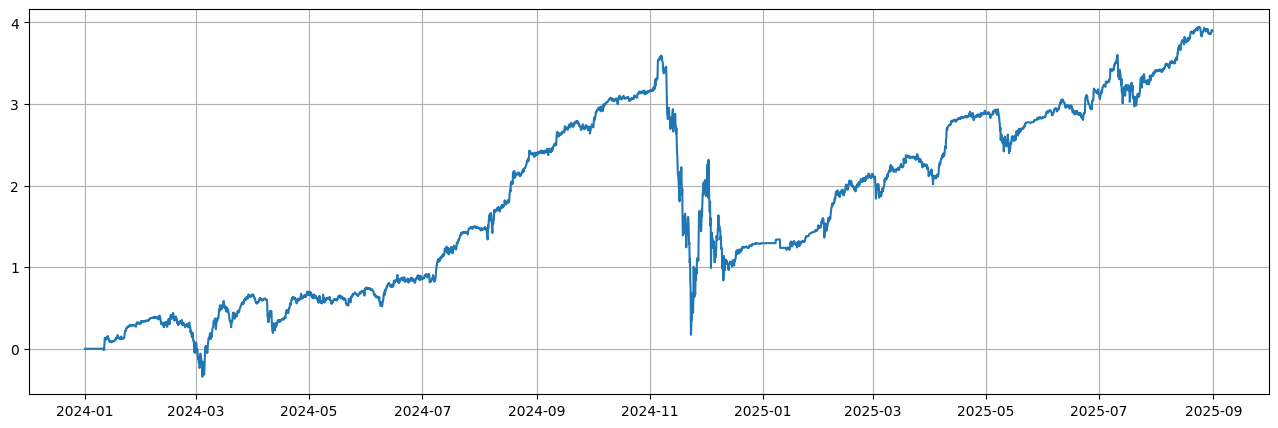

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(total_position)

plt.grid()
plt.show()

In [279]:
raw_gross_returns = total_position / total_position.shift() - 1
processed_gross_returns = raw_gross_returns[(raw_gross_returns != float('inf')) & (raw_gross_returns != float('-inf')) & (~np.isnan(raw_gross_returns))]
processed_gross_returns

open_time
2024-01-11 00:00:00   -0.550257
2024-01-11 04:00:00   -2.209970
2024-01-11 08:00:00   -4.000807
2024-01-11 12:00:00   -4.150413
2024-01-11 16:00:00    1.682730
                         ...   
2025-08-30 16:00:00    0.002656
2025-08-30 20:00:00    0.000680
2025-08-31 00:00:00    0.008941
2025-08-31 04:00:00   -0.002535
2025-08-31 08:00:00   -0.000070
Length: 3591, dtype: float64

In [280]:
processed_gross_returns.mean() / processed_gross_returns.std() * np.sqrt(365 * 6)

-0.4062071093298943

# Grid Search

In [53]:
min_period_req = 6 * 5


sr_gross_rets = dict()

for trade_start_time in [datetime(2022, 1, 1, 0, 0), datetime(2023, 1, 1, 0, 0), datetime(2024, 1, 1, 0, 0)]:
    period_px_4h = px_4h.loc[:trade_start_time].iloc[:-1]
    price_data = px_4h.loc[trade_start_time:]
    
    for significance_level in [0.01, 1e-3, 1e-5]:
        pvalue_matrix, pairs = find_cointegrated_pairs(
            period_px_4h,
            significance_level
        )
        
        for beta_calculation_num_periods in [6 * 182, 6 * 91, 6 * 45, 6 * 21, 6 * 14, 6 * 7]:
            for z_score_calculation_num_periods in [6 * 150, 6 * 182, 6 * 91, 6 * 45, 6 * 21, 6 * 14, 6 * 7, 6]:
            
                if min_period_req > min(beta_calculation_num_periods, z_score_calculation_num_periods):
                    continue
                    
                for measure_type in ("drop first day", "don't drop first day"):
                    
                    for (entry_z_score, exit_z_score) in [
                        (2.00, 1.00), (3.00, 2.00), (2.00, 0.75), (3.00, 1.50),
                        (1.75, 0.75), (1.50, 0.50), (3.00, 1.00)
                    ]:
            
                        total_position = pd.Series(0.0, index = price_data.index)

                        for pair in pairs:
                            dependent_coin, independent_coin, _ = pair
                            df = run_single_pair_trade_simulation(
                                price_data,
                                independent_coin,
                                dependent_coin,
                                beta_calculation_num_periods,
                                z_score_calculation_num_periods,
                                min_period_req,
                                entry_z_score,
                                exit_z_score
                            )

                            total_position += df["total position"].fillna(0.0)

                        raw_gross_returns = total_position / total_position.shift() - 1
                        processed_gross_returns = raw_gross_returns[(raw_gross_returns != float('inf')) & (raw_gross_returns != float('-inf')) & (~np.isnan(raw_gross_returns))]


                        if measure_type == "drop first day":
                            processed_gross_returns = processed_gross_returns.iloc[6:]

                        sr = processed_gross_returns.mean() / processed_gross_returns.std() * np.sqrt(365 * 6)

                        key = (
                            trade_start_time,
                            significance_level,
                            beta_calculation_num_periods,
                            z_score_calculation_num_periods,
                            measure_type,
                            entry_z_score,
                            exit_z_score,
                        )
                        sr_gross_rets[key] = sr
                        print(key)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, 'drop first day', 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, "don't drop first day", 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 900, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 109

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 1092, 42, "don't drop first day", 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, 'drop first day', 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 900, "do

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 42, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 42, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 546, 42, "don't drop first day", 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, 'drop first day', 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 900, '

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, 'drop first day', 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 270, 42, "don't drop first day", 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 900, 'drop first day', 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126,

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, 'drop first day', 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, 'drop first day', 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 126, 42, "don't drop first day", 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 900,

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, 'drop first day', 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 84, 42, "don't drop first day", 3.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 900, 'drop first day', 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 900, 'drop first day', 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 900, 'drop first day', 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 900, 'drop 

(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 2.0, 1.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 3.0, 2.0)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 2.0, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 3.0, 1.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 1.75, 0.75)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 1.5, 0.5)
(datetime.datetime(2024, 1, 1, 0, 0), 1e-05, 42, 42, "don't drop first day", 3.0, 1.0)


In [54]:
sr_gross_rets_ser = pd.Series(sr_gross_rets).to_frame().rename(columns={0: "Sharpe ratio"})
sr_gross_rets_ser.sort_values(by="Sharpe ratio", ascending=False).iloc[:20]

Sharpe ratio
2024-01-01 0.00001 1092 42  drop first day       3.0 1.0      4.178178
                            don't drop first day 3.0 1.0      4.172734
                            drop first day       3.0 1.5      4.105355
                            don't drop first day 3.0 1.5      4.100006
                            drop first day       3.0 2.0      4.090225
                            don't drop first day 3.0 2.0      4.084794
                        84  don't drop first day 3.0 1.0      3.642547
                   546  84  don't drop first day 3.0 1.0      3.638991
                   1092 270 don't drop first day 3.0 1.0      3.553601
                        84  drop first day       3.0 1.0      3.545582
                   546  84  drop first day       3.0 1.0      3.542265
                   270  42  drop first day       3.0 1.5      3.530153
                            don't drop first day 3.0 1.5      3.520028
                            drop first day       3.0 2.0      3.505928
                            don't drop first day 3.0 2.0      3.495566
                   546  84  drop first day       3.0 1.5      3.484585
                            don't drop first day 3.0 1.5      3.481476
                   1092 270 drop first day       3.0 1.5      3.465485
                            don't drop first day 3.0 1.5      3.462394
                            drop first day       3.0 1.0      3.445320

In [ ]:
trade_start_time = datetime(2024, 1, 1, 0, 0)
significance_level = 1e-5
beta_calculation_num_periods = 1092
z_score_calculation_num_periods = 42
min_period_req = 6 * 5
entry_z_score = 3.0
exit_z_score = 1.0
measure_type = "drop first day"

################################

period_px_4h = px_4h.loc[:trade_start_time].iloc[:-1]
price_data = px_4h.loc[trade_start_time:]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    significance_level
)

total_position = pd.Series(0.0, index = price_data.index)
total_turnover = pd.Series(0.0, index = price_data.index)

for pair in pairs:
    dependent_coin, independent_coin, _ = pair
    df = run_single_pair_trade_simulation(
        price_data,
        independent_coin,
        dependent_coin,
        beta_calculation_num_periods,
        z_score_calculation_num_periods,
        min_period_req,
        entry_z_score,
        exit_z_score
    )

    total_position += df["total position"].fillna(0.0)
    total_turnover += df["dollar turnover"].fillna(0.0)

raw_gross_returns = total_position / total_position.shift() - 1
processed_gross_returns = raw_gross_returns[(raw_gross_returns != float('inf')) & (raw_gross_returns != float('-inf')) & (~np.isnan(raw_gross_returns))]

tcost_bps = 20 # (commission + slippage)
processed_total_turnover = total_turnover.loc[processed_gross_returns.index]
net_returns = processed_gross_returns.subtract(processed_total_turnover * tcost_bps * 1e-4, fill_value = 0)

if measure_type == "drop first day":
    processed_gross_returns = processed_gross_returns.iloc[6:]
    net_returns = net_returns.iloc[6:]

gross_sr = processed_gross_returns.mean() / processed_gross_returns.std() * np.sqrt(365 * 6)
net_sr = net_returns.mean() / net_returns.std() * np.sqrt(365 * 6)
net_sr

In [88]:
gross_sr

4.178177884663614

In [89]:
net_sr

4.0102686125700515

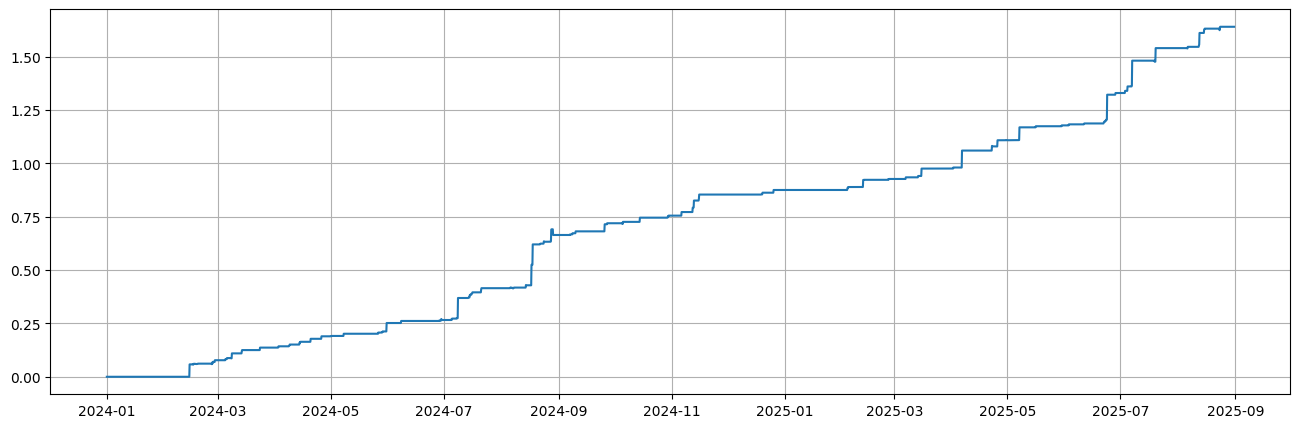

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(total_position)

plt.grid()
plt.show()

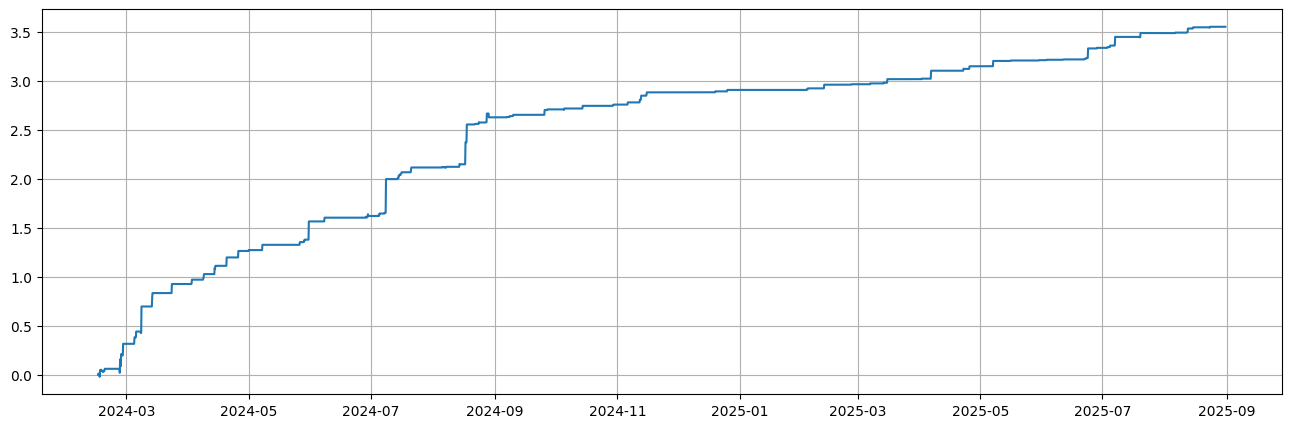

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(processed_gross_returns.cumsum())

plt.grid()
plt.show()

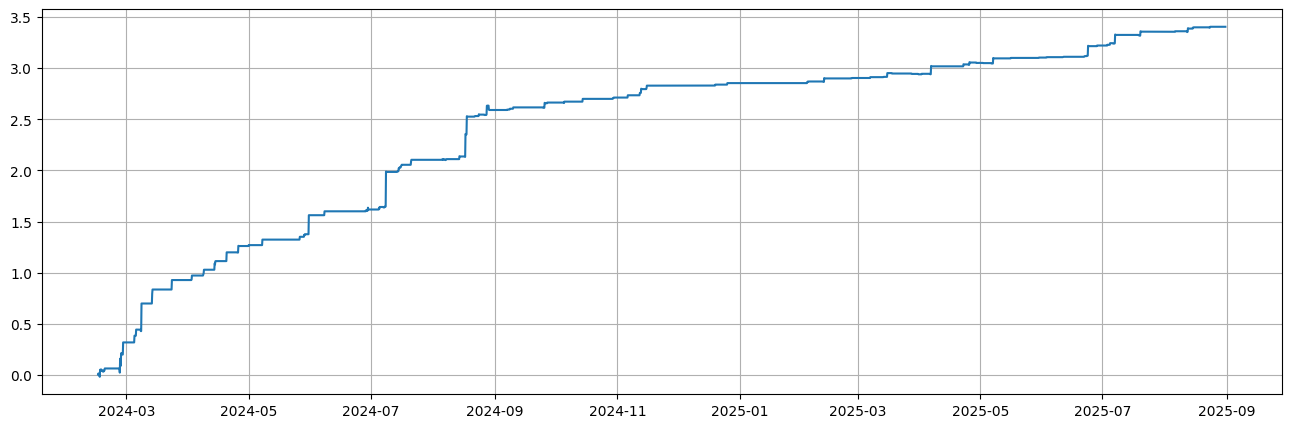

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(net_returns.cumsum())

plt.grid()
plt.show()

In [64]:
df

,beta,spread,z_score,spread position,dep coin share count,indep coin share count,dep coin closing dollar position,indep coin closing dollar position,dep coin dollars earned,indep coin dollars earned,cumulative earnings,total position
open_time,,,,,,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2024-01-01 04:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2024-01-01 08:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2024-01-01 12:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2024-01-01 16:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,-0.373224,0.993681,-0.639961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546576,0.546576
2025-08-30 20:00:00,-0.369328,0.993608,-0.616299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546576,0.546576
2025-08-31 00:00:00,-0.364589,1.011860,2.494345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546576,0.546576


In [77]:
open_spread_indices = (abs(df["spread position"]) == 1) & (df["spread position"].shift() == 0)
close_spread_indices = (df["spread position"] == 0) & (abs(df["spread position"].shift()) == 1)

In [78]:
df[open_long_spread_indices]

,beta,spread,z_score,spread position,dep coin share count,indep coin share count,dep coin closing dollar position,indep coin closing dollar position,dep coin dollars earned,indep coin dollars earned,cumulative earnings,total position,turnover
open_time,,,,,,,,,,,,,
2024-02-14 16:00:00,-0.098845,0.982773,-0.205230,1.0,1.048663,0.060993,1.026955,2.143277e-03,-0.997907,-2.092653e-03,-1.000000,0.029099,1.0
2024-04-25 08:00:00,-0.067689,1.004562,3.034174,-1.0,-0.995451,-0.067602,-0.997342,-2.658114e-03,0.997342,2.658114e-03,1.029099,0.029099,1.0
2024-07-07 04:00:00,-0.112194,0.952078,-3.027112,1.0,1.050069,0.127694,0.996935,3.048051e-03,-0.996935,-3.064651e-03,-0.959188,0.040796,1.0
2024-08-17 00:00:00,0.091978,0.948303,-3.686970,1.0,1.050252,-0.088456,0.998055,-1.920369e-03,-0.998055,1.945137e-03,-0.907071,0.089064,1.0
2024-08-17 20:00:00,0.094532,0.993997,0.712070,1.0,1.049575,-0.102353,1.045481,-2.277344e-03,-0.997726,2.274274e-03,-0.858317,0.184887,1.0
2024-08-26 16:00:00,0.093221,0.966963,-2.885205,1.0,1.029361,-0.095480,0.997657,-2.291518e-03,-0.997657,2.343078e-03,-0.810427,0.184939,1.0
2024-09-25 00:00:00,0.050892,0.978746,-2.714575,1.0,1.019072,-0.052990,0.998690,-1.306209e-03,-0.998690,1.309918e-03,-0.796652,0.200732,1.0
2024-11-12 04:00:00,0.238209,0.960887,-2.951125,1.0,1.036413,-0.249728,1.003041,-7.247099e-03,-0.992988,7.012355e-03,-0.768646,0.227147,1.0
2025-02-11 20:00:00,0.013189,0.979762,-2.786444,1.0,1.019765,-0.012942,0.999574,-4.296875e-04,-0.999574,4.260636e-04,-0.754423,0.244721,1.0


In [79]:
df.loc[datetime(2024, 2, 13, 0, 0):datetime(2024, 2, 15, 0, 0)]

,beta,spread,z_score,spread position,dep coin share count,indep coin share count,dep coin closing dollar position,indep coin closing dollar position,dep coin dollars earned,indep coin dollars earned,cumulative earnings,total position,turnover
open_time,,,,,,,,,,,,,
2024-02-13 00:00:00,0.037757,0.994023,1.209441,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-13 04:00:00,0.048519,0.993653,1.201458,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-13 08:00:00,0.058380,0.993348,1.211471,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-13 12:00:00,0.066744,0.993103,1.239604,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-13 16:00:00,0.076287,0.992781,1.212308,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-13 20:00:00,0.057671,0.980420,-0.701690,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-14 00:00:00,0.036165,0.981102,-0.554969,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-14 04:00:00,0.057542,0.993214,1.401496,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-02-14 08:00:00,0.079604,0.992419,1.209008,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [83]:
df["dollar turnover"] = 0.0
df.loc[open_spread_indices, "dollar turnover"] = abs(df.loc[open_spread_indices, "dep coin dollars earned"]) + abs(df.loc[open_spread_indices, "indep coin dollars earned"])
df.loc[close_spread_indices, "dollar turnover"] = abs(df.loc[close_spread_indices, "dep coin dollars earned"]) + abs(df.loc[close_spread_indices, "indep coin dollars earned"])

In [84]:
df.loc[close_spread_indices]

,beta,spread,z_score,spread position,dep coin share count,indep coin share count,dep coin closing dollar position,indep coin closing dollar position,dep coin dollars earned,indep coin dollars earned,cumulative earnings,total position,turnover
open_time,,,,,,,,,,,,,
2024-02-14 20:00:00,-0.132452,0.986148,0.209722,0.0,0.0,0.0,0.0,0.0,1.026955,0.002143,0.029099,0.029099,1.029099
2024-04-26 00:00:00,-0.066700,0.992708,0.913544,0.0,0.0,0.0,0.0,0.0,-0.985596,-0.002691,0.040812,0.040812,0.988286
2024-07-08 16:00:00,-0.044312,0.957252,-1.344769,0.0,0.0,0.0,0.0,0.0,1.045239,0.002988,0.089039,0.089039,1.048227
2024-08-17 08:00:00,0.090208,0.994131,0.803064,0.0,0.0,0.0,0.0,0.0,1.046156,-0.001951,0.137134,0.137134,1.048108
2024-08-18 00:00:00,0.091766,0.994059,0.700976,0.0,0.0,0.0,0.0,0.0,1.045481,-0.002277,0.184887,0.184887,1.047759
2024-08-29 00:00:00,0.101203,0.993389,1.171695,0.0,0.0,0.0,0.0,0.0,1.013303,-0.002148,0.200728,0.200728,1.015452
2024-09-25 20:00:00,0.048775,0.995110,0.119759,0.0,0.0,0.0,0.0,0.0,1.015301,-0.001320,0.217329,0.217329,1.016621
2024-11-13 00:00:00,0.252487,0.971678,-1.065386,0.0,0.0,0.0,0.0,0.0,1.020142,-0.006770,0.244725,0.244725,1.026912
2025-02-12 08:00:00,0.014547,0.995817,0.523064,0.0,0.0,0.0,0.0,0.0,1.015992,-0.000425,0.261144,0.261144,1.016417


In [85]:
df.loc[datetime(2024, 2, 14, 0, 0):datetime(2024, 2, 16, 0, 0)]

,beta,spread,z_score,spread position,dep coin share count,indep coin share count,dep coin closing dollar position,indep coin closing dollar position,dep coin dollars earned,indep coin dollars earned,cumulative earnings,total position,turnover
open_time,,,,,,,,,,,,,
2024-02-14 00:00:00,0.036165,0.981102,-0.554969,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-14 04:00:00,0.057542,0.993214,1.401496,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-14 08:00:00,0.079604,0.992419,1.209008,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-14 12:00:00,-0.058162,0.953596,-3.927732,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-02-14 16:00:00,-0.098845,0.982773,-0.205230,1.0,1.048663,0.060993,1.026955,0.002143,-0.997907,-0.002093,-1.000000,0.029099,1.000000
2024-02-14 20:00:00,-0.132452,0.986148,0.209722,0.0,0.000000,0.000000,0.000000,0.000000,1.026955,0.002143,0.029099,0.029099,1.029099
2024-02-15 00:00:00,-0.170180,0.987758,0.393830,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029099,0.029099,0.000000
2024-02-15 04:00:00,-0.128228,1.000116,1.849732,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029099,0.029099,0.000000
2024-02-15 08:00:00,-0.166901,0.991118,0.701028,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029099,0.029099,0.000000


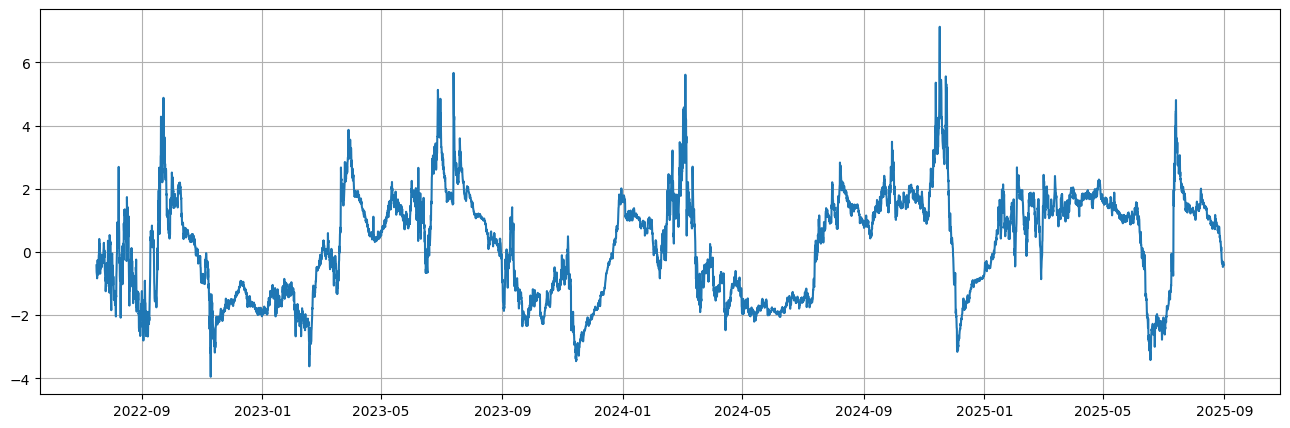

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(z_scores.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

plt.grid()
plt.show()

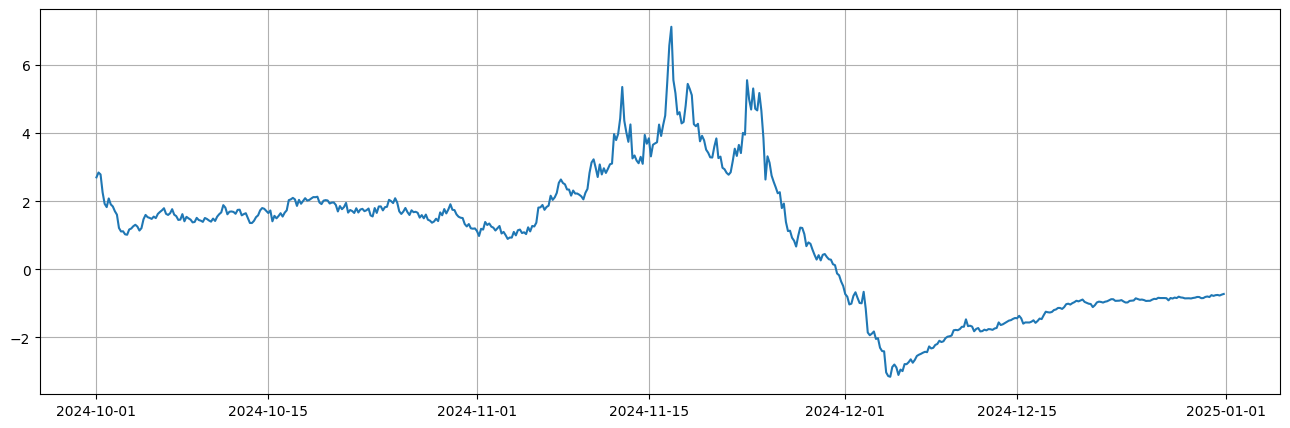

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(z_scores.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0)])

plt.grid()
plt.show()

In [89]:
df

,beta,spread,z_score,spread position,XLM share count,DOT share count,XLM closing dollar position,DOT closing dollar position,XLM dollars earned,DOT dollars earned,cumulative earnings,total position
open_time,,,,,,,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.00000,NaN
2020-12-20 04:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.00000,NaN
2020-12-20 08:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.00000,NaN
2020-12-20 12:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.00000,NaN
2020-12-20 16:00:00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,0.032394,0.236283,-0.381285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.15417,-0.15417
2025-08-30 20:00:00,0.032374,0.238052,-0.340339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.15417,-0.15417
2025-08-31 00:00:00,0.032319,0.238823,-0.324648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.15417,-0.15417


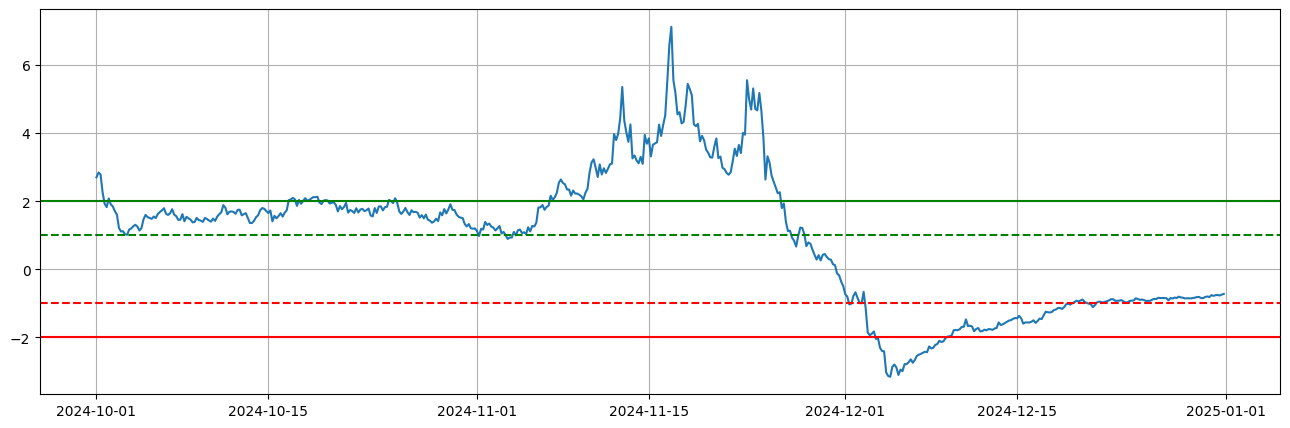

In [90]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "z_score"])

plt.axhline(entry_z_score, color="green", linestyle="-")
plt.axhline(exit_z_score, color="green", linestyle="--")

plt.axhline(-entry_z_score, color="red", linestyle="-")
plt.axhline(-exit_z_score, color="red", linestyle="--")

plt.grid()
plt.show()

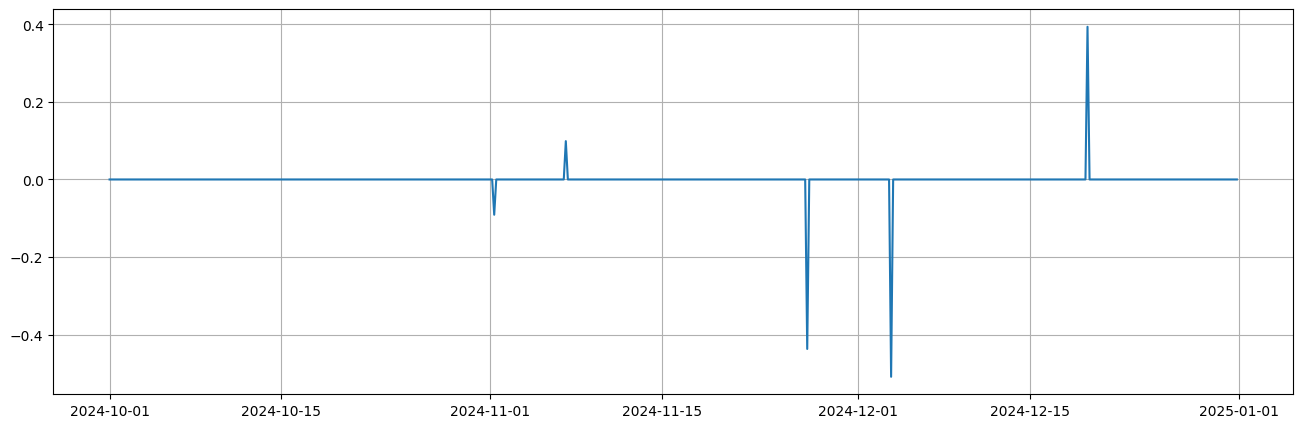

In [91]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "XLM dollars earned"])

plt.grid()
plt.show()

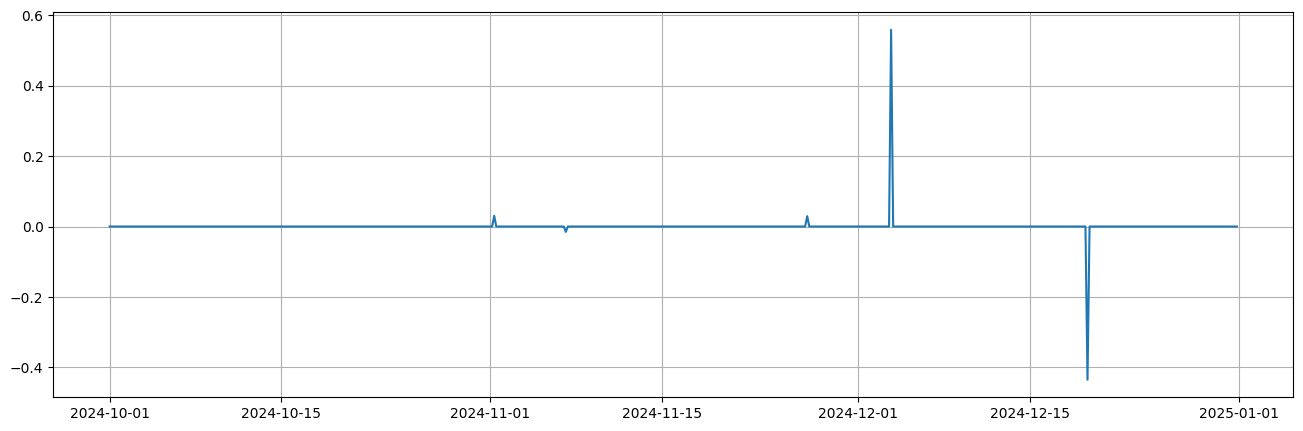

In [92]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "DOT dollars earned"])

plt.grid()
plt.show()

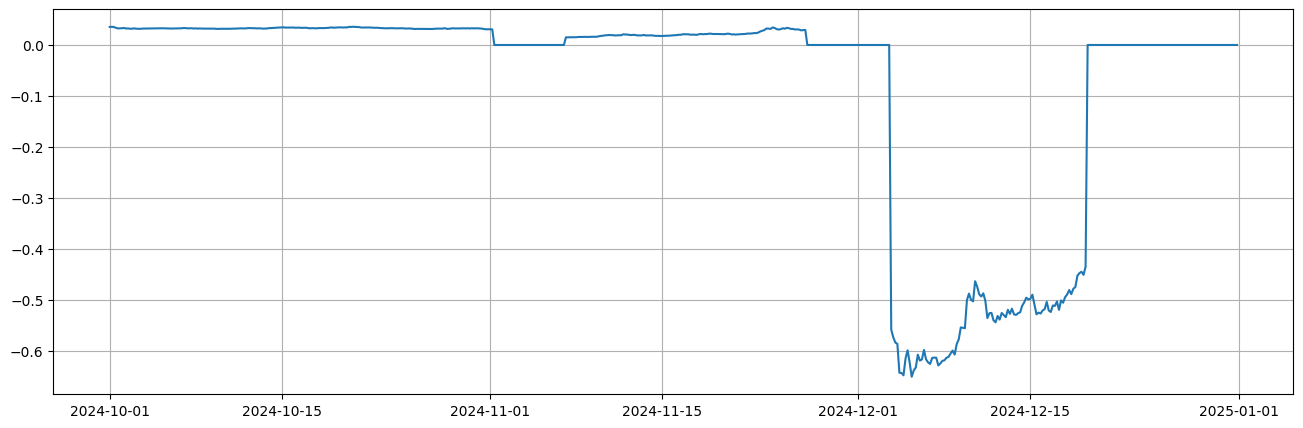

In [93]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "DOT closing dollar position"])

plt.grid()
plt.show()

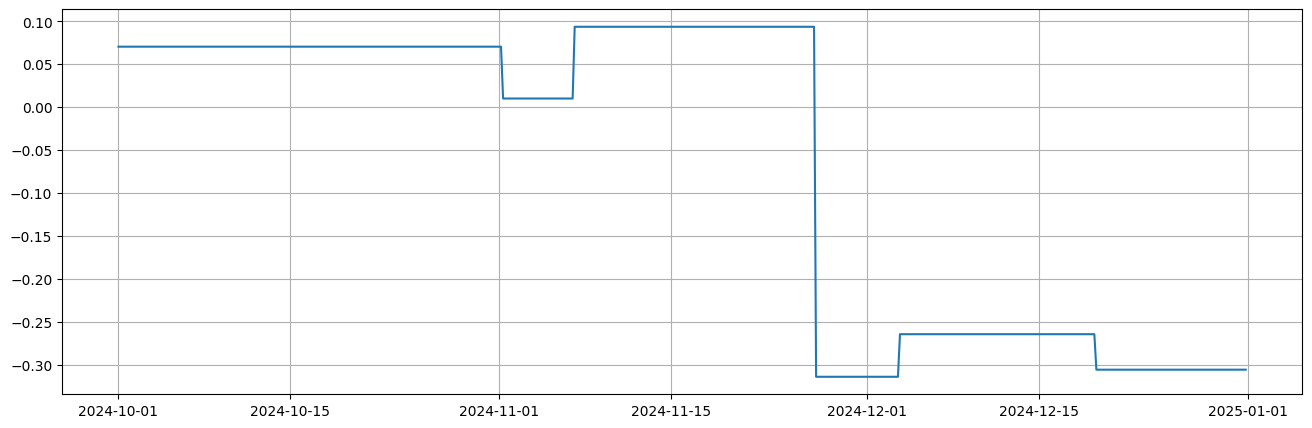

In [94]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "cumulative earnings"])

plt.grid()
plt.show()

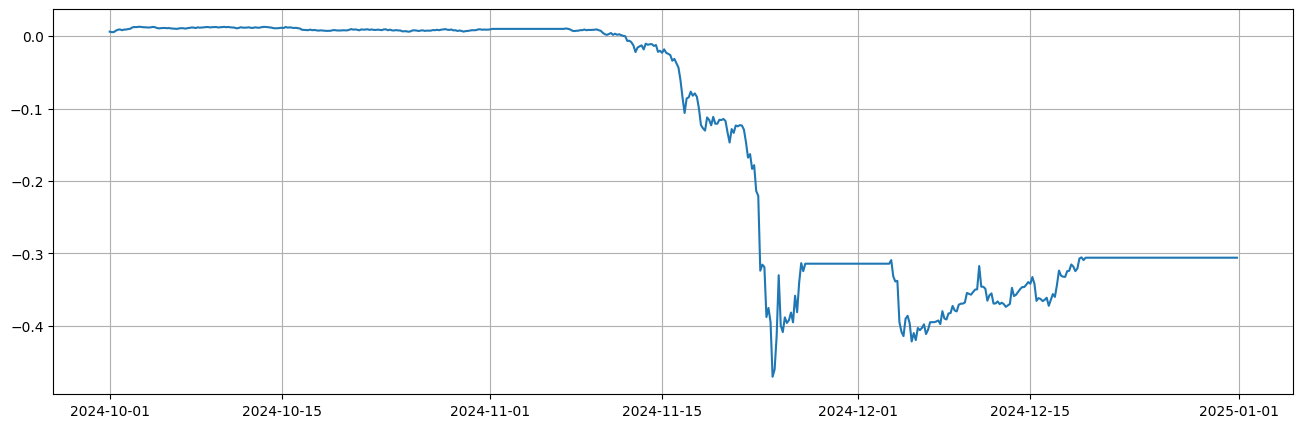

In [95]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2024, 10, 1, 0, 0):datetime(2024, 12, 31, 20, 0), "total position"])

plt.grid()
plt.show()

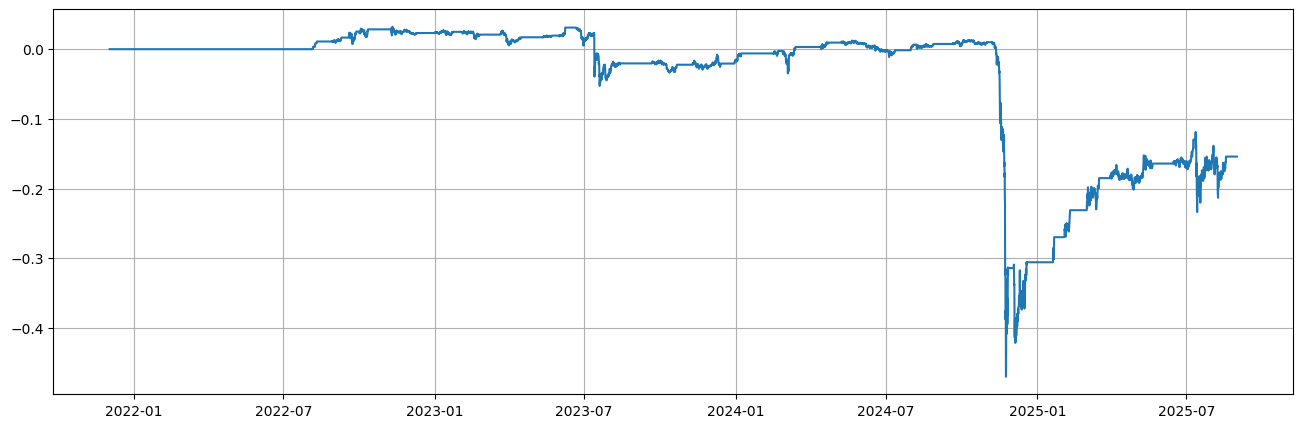

In [97]:
plt.figure(figsize=(16,5))
plt.plot(df["total position"])

plt.grid()
plt.show()